In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib

OUTPUTS_FOLDER = '../outputs/'

# OCO $\eta$ trend

## GDAS, $\eta$ = 0.1

In [35]:
experiment_filename = '2019-12-16.09-58-gdas-oco-0.1.npy'

experiment_path = OUTPUTS_FOLDER + experiment_filename

experiment = np.load(experiment_path, allow_pickle=True).item()

results = experiment['results']

queries = results['queries']

failure_rate = (queries == -1).sum() / queries.shape[0]

successful_queries = queries[queries != -1]
mean_queries = successful_queries.mean()
median_queries = np.median(successful_queries)

print(f'Failure rate: {failure_rate}')
print(f'Mean queries: {mean_queries}')
print(f'Median queries: {median_queries}')

results

Failure rate: 0.063
Mean queries: 303.4151547491996
Median queries: 18.0


{'queries': array([   2,   20,  316,   22,   14, 4174,    4,   22,    2,   12,   18,
           2,   30,   18,   26, 2330,   20,   18,    2, 1126,   12,   12,
          62,  138,   62,   24,    2,   36,   30,  138,   18,   26,   -1,
           2,   26,   42,   12, 1724,    8,   -1,    2,   42,   46,   18,
           2,  304, 1104,    2,   12,    2,    2,    8,   12,   24,   -1,
           2,  234,   52,    2,    2,    8,    2,    2,   10,   14,    2,
         430,   42,   26,   -1, 1324,    2,    2,    4,   18, 6708,    4,
          18,   34,    2,    2,    6,   -1,   12,  824,    2,  344,  504,
          18,  298,   34,    2,   10,   28,   70, 2316,  228,   12,    2,
        3086,   46,   50, 1128,    2,   10,   72,   30,   -1,   12,    2,
           2, 2932,   -1,   28,   74,    8,  782, 1018,   14,    4,    2,
           4,   38,    2,   52,    2,  354,   -1,  598,   18,  624,    2,
           2, 2324,   -1, 1000,  168,   16,   10,   18,    6,    2,  134,
           2,    6,   18,  

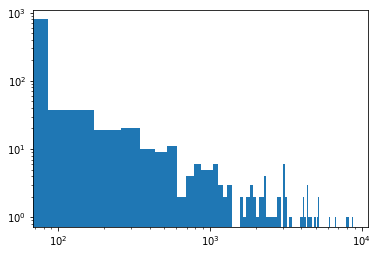

In [34]:
plt.hist(results['queries'], bins=100)
plt.xscale('log')
_ = plt.yscale('log')

<BarContainer object of 2 artists>

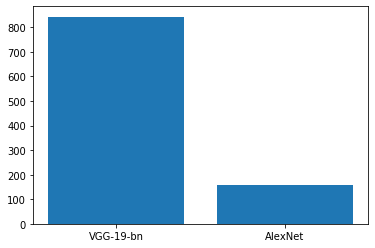

In [122]:
from collections import Counter

final_models = Counter(results['final_model'])

plt.bar(list(final_model), [final_model[model] for model in final_models])

In [132]:
queries = results['queries']

queries[0]

2

## GDAS, $\eta$ = 100

In [123]:
experiment_filename = '2019-12-15.22-23-oco-100.npy'

experiment_path = OUTPUTS_FOLDER + experiment_filename

experiment = np.load(experiment_path, allow_pickle=True).item()

results = experiment['results']

queries = results['queries']

failure_rate = (queries == -1).sum() / queries.shape[0]

successful_queries = queries[queries != -1]
mean_queries = successful_queries.mean()
median_queries = np.median(successful_queries)

print(f'Failure rate: {failure_rate}')
print(f'Mean queries: {mean_queries}')
print(f'Median queries: {median_queries}')

Failure rate: 0.144
Mean queries: 684.4836448598131
Median queries: 14.0


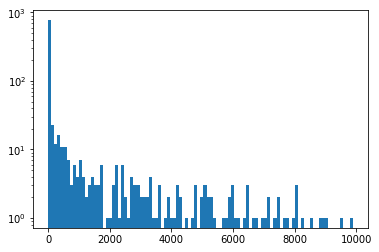

In [124]:
plt.hist(results['queries'], bins=100)
_ = plt.yscale('log')

<BarContainer object of 2 artists>

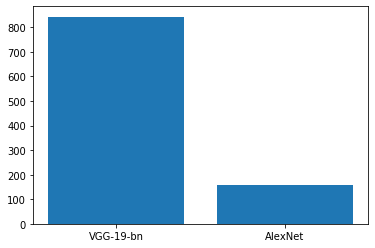

In [125]:
from collections import Counter

final_models = Counter(results['final_model'])

plt.bar(list(final_model), [final_model[model] for model in final_models])

# Gradient behavior

## Failed attack

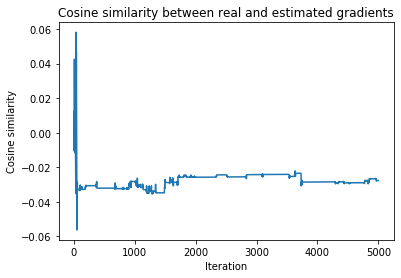

In [137]:
experiment_filename = '2019-12-16.13-47-oco-0.1-grad.npy'

experiment_path = OUTPUTS_FOLDER + experiment_filename

experiment = np.load(experiment_path, allow_pickle=True).item()
results = experiment['results']

gradient_products = results['gradient_products']
true_gradient_norms = results['true_gradient_norms']
estimated_gradient_norms = results['estimated_gradient_norms']

plt.plot(gradient_products[39])
plt.xlabel('Iteration')
plt.ylabel('Cosine similarity')
_ = plt.title('Cosine similarity between real and estimated gradients')

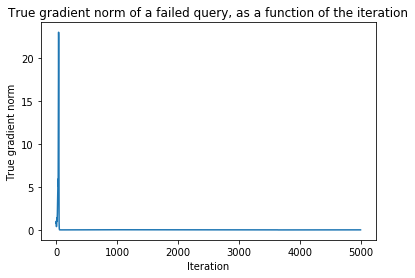

In [127]:
plt.plot(true_gradient_norms[39])
plt.xlabel('Iteration')
plt.ylabel('True gradient norm')
_ = plt.title('True gradient norm of a failed query, as a function of the iteration')

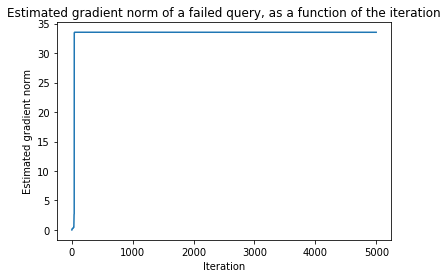

In [128]:
plt.plot(estimated_gradient_norms[39])
plt.xlabel('Iteration')
plt.ylabel('Estimated gradient norm')
_ = plt.title('Estimated gradient norm of a failed query, as a function of the iteration')

## Successful attack

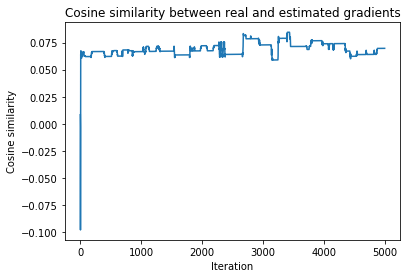

In [138]:
experiment_filename = '2019-12-17.10.53-gradient-successful.npy'

experiment_path = OUTPUTS_FOLDER + experiment_filename

experiment = np.load(experiment_path, allow_pickle=True).item()
results = experiment['results']

gradient_products = results['gradient_products']
true_gradient_norms = results['true_gradient_norms']
estimated_gradient_norms = results['estimated_gradient_norms']

plt.plot(gradient_products[0])
plt.xlabel('Iteration')
plt.ylabel('Cosine similarity')
_ = plt.title('Cosine similarity between real and estimated gradients')

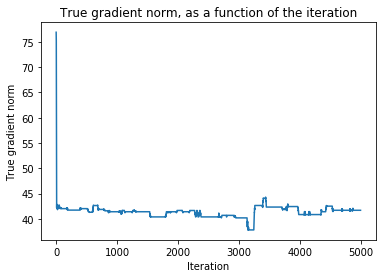

In [139]:
plt.plot(true_gradient_norms[0])
plt.xlabel('Iteration')
plt.ylabel('True gradient norm')
_ = plt.title('True gradient norm, as a function of the iteration')

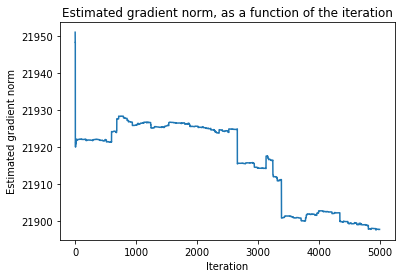

In [140]:
plt.plot(estimated_gradient_norms[0])
plt.xlabel('Iteration')
plt.ylabel('Estimated gradient norm')
_ = plt.title('Estimated gradient norm, as a function of the iteration')

In [19]:
grad_experiment_filename = '2019-12-17.22-52-gdas-oco-0.1-no-stop.npy'

complete_experiment_filename = '2019-12-16.09-58-gdas-oco-0.1.npy'

grad_experiment_path = OUTPUTS_FOLDER + experiment_filename
complete_experiment_path = OUTPUTS_FOLDER + complete_experiment_filename

grad_experiment = np.load(experiment_path, allow_pickle=True).item()
complete_experiment = np.load(complete_experiment_path, allow_pickle=True).item()

n = grad_experiment['results']['gradient_products'].shape[0]

first_n_queries = complete_experiment['results']['queries'][:n, :]

succesful_images_mask = first_n_queries != -1

gradient_similarities = grad_experiment['results']['gradient_products']

successful_gradient_similarities = gradient_similarities[succesful_images_mask]
failed_gradient_similarities = gradient_similarities[~succesful_images_mask]

non_null_sim = gradient_similarities[~np.isnan(gradient_similarities).any(axis=1)]

plt.plot(non_null_sim.mean(axis=0))

FileNotFoundError: [Errno 2] No such file or directory: '../outputs/2019-12-16.09-58-oco-0.1.npy'

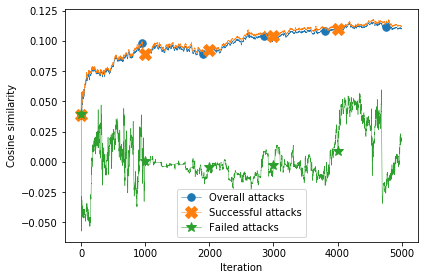

In [20]:
grad_experiment_filename = '2019-12-17.22-52-gdas-oco-0.1-no-stop.npy'

complete_experiment_filename = '2019-12-16.09-58-gdas-oco-0.1.npy'

grad_experiment_path = OUTPUTS_FOLDER + grad_experiment_filename
complete_experiment_path = OUTPUTS_FOLDER + complete_experiment_filename

grad_experiment = np.load(grad_experiment_path, allow_pickle=True).item()
complete_experiment = np.load(complete_experiment_path, allow_pickle=True).item()

n = grad_experiment['results']['gradient_products'].shape[0]

first_n_queries = complete_experiment['results']['queries'][:n]

succesful_images_mask = first_n_queries != -1

gradient_similarities = grad_experiment['results']['gradient_products']
successful_gradient_similarities = gradient_similarities[succesful_images_mask]
failed_gradient_similarities = gradient_similarities[~succesful_images_mask]

non_null_grad_sim = gradient_similarities[~np.isnan(gradient_similarities).any(axis=1)]
non_null_successful_gradient_sim = successful_gradient_similarities[~np.isnan(successful_gradient_similarities).any(axis=1)]
non_null_failed_gradient_sim = failed_gradient_similarities[~np.isnan(failed_gradient_similarities).any(axis=1)]

plt.plot(non_null_grad_sim.mean(axis=0), label='Overall attacks', marker='.', markersize=15, markevery=950, linewidth=0.5)
plt.plot(non_null_successful_gradient_sim.mean(axis=0), label='Successful attacks', marker='X', markersize=12, markevery=1000, linewidth=0.5)
plt.plot(non_null_failed_gradient_sim.mean(axis=0), label='Failed attacks', marker='*', markersize=10, markevery=1000, linewidth=0.5)
plt.xlabel('Iteration')
plt.ylabel('Cosine similarity')
plt.legend()
plt.tight_layout()

plt.savefig('cos_similarity.pdf')

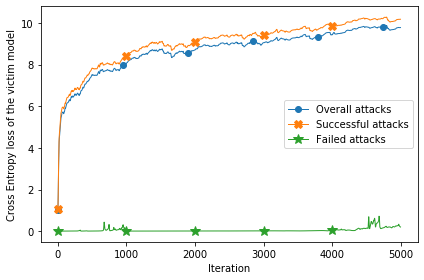

In [9]:
losses = grad_experiment['results']['true_losses']
successful_losses = losses[succesful_images_mask]
failed_losses = losses[~succesful_images_mask]

non_null_grad_losses = losses[~np.isnan(losses).any(axis=1)]
non_null_successful_gradient_losses = successful_losses[~np.isnan(successful_losses).any(axis=1)]
non_null_failed_gradient_losses = failed_losses[~np.isnan(failed_losses).any(axis=1)]

plt.plot(non_null_grad_losses.mean(axis=0), label='Overall attacks', marker='.', markersize=12, markevery=950, linewidth=1)
plt.plot(non_null_successful_gradient_losses.mean(axis=0), label='Successful attacks', marker='X', markersize=8, markevery=1000, linewidth=1)
plt.plot(non_null_failed_gradient_losses.mean(axis=0), label='Failed attacks', marker='*', markersize=10, markevery=1000, linewidth=1)
plt.xlabel('Iteration')
plt.ylabel('Cross Entropy loss of the victim model')
plt.legend()
plt.tight_layout()

plt.savefig('loss.pdf')

In [21]:
non_null_grad_sim.shape

(48, 5000)

In [23]:
non_null_successful_gradient_losses.shape

(48, 5000)

In [24]:
non_null_failed_gradient_losses.shape

(2, 5000)

In [25]:
from scipy.stats import normaltest

stat, p = normaltest(non_null_grad_sim, axis=0)

In [30]:
(p < 0.05).sum()

5